# Prediction Analysis of Risky Credit using Neural Networks, Decision Trees with 10 fold CV and Random Forests


## About the dataset

The original dataset contains 1000 entries with 20 categorial/symbolic attributes prepared by Prof. Hofmann. In this dataset, each entry represents a person who takes a credit by a bank. Each person is classified as good or bad credit risks according to the set of attributes.

The attributes are : 

- Age: Age in years ranging from 19 to 120
- Amount: Credit amount any value	from zero to 20,000
- checking:Existing	status	of	checking	account - 1, 2,	3 or 4
- coapp: Status	of	other	debtors/guarantors - 1,	2 or 3
- depends: Dependents	1 (none)	or	2(1	or	more)
- duration: Interval Loan	duration:		1	to	72 months
- employed: Employment	duration	status:	1,	2,	3,	4	or	5
- existcr:  Number	of	existing	bank	loans:		1,	2,	3	or	4
- foreign: Foreign	worker:		1	(yes)	or	2	(no)
- good_bad: Credit	rating:	‘bad’	or	‘good’
- history: Credit	history:		0,	1,	2,	3	or	4
- housing: Housing	status:	1,	2,	or	3
- installp: Installment	rate	as	percent	of	income:		1,	2,	3	or	4
- job: Employment	status:		1,	2,	3	or	4
- marital: Status	and	gender:	1, 2,	3	or	4
- other: Other	installment	plans:		1,	2	or	3
- property: Property	ownership:		1,	2,	3	ore	4
- purpose: Loan	purpose:		0,	1,	2,	3,	4,	5,	6,,	8,	9,	X	(capital	X)
- resident: Permanent	residence	status:		1,	2,	3	or	4
- savings: Savings	account	status:		1,	2,	3,	4	or	5
- Telephone: 1(no	registered	phone)	or	2(registered	phone)


## Table of contents

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#about_dataset">About the dataset</a></li>
        <li><a href="#preprocessing">Data pre-processing and selection (Data Imputation-Replacement-Outliers Analysis)</a></li>
        <li><a href="#modeling">Modeling on Neural Networks</a></li>
        <li><a href="#modeling">Modeling on Decision Trees with 10 fold CV</a></li>
        <li><a href="#modeling">Modeling on Random Forests</a></li>
        <li><a href="#evaluation">Evaluation</a></li>
    </ol>
</div>
<br>
<hr>

The objective of the problem is to develop a model for correctly identifying the credit risk of a customer for a bank.

In [2]:
#Installing required Libraries
import pandas as pd
import numpy as np
import math
from AdvancedAnalytics import NeuralNetwork
from AdvancedAnalytics import ReplaceImputeEncode
from AdvancedAnalytics import DecisionTree
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [3]:
#Read Datafile
file_path = 'C:/Users/vasuk/Desktop/Sem 2/Stat 656/Week5/'
df = pd.read_excel(file_path+"CreditHistory_Clean.xlsx")

In [4]:
#Data
df.head()

,age,amount,duration,checking,history,purpose,savings,employed,installp,marital,...,resident,property,other,housing,existcr,job,depends,telephon,foreign,good_bad
0,67,1169,6,1,4,3,5,5,4,3,...,4,1,3,2,2,3,1,2,1,good
1,22,5951,48,2,2,3,1,3,2,2,...,2,1,3,2,1,3,1,1,1,bad
2,49,2096,12,4,4,6,1,4,2,3,...,3,1,3,2,1,2,2,1,1,good
3,45,7882,42,1,2,2,1,4,2,3,...,4,2,3,3,1,3,2,1,1,good
4,53,4870,24,1,3,0,1,3,3,3,...,4,4,3,3,2,3,2,1,1,bad


In [5]:
#Data Type converisons as per the dictionary
df['checking']=df['checking'].astype(str)
df['coapp']=df['coapp'].astype(str)
df['depends']=df['depends'].astype(str)
df['employed']=df['employed'].astype(str)
df['existcr']=df['existcr'].astype(str)
df['history']=df['history'].astype(str)
df['foreign']=df['foreign'].astype(str)
df['good_bad']=df['good_bad'].astype(str)
df['installp']=df['installp'].astype(str)
df['job']=df['job'].astype(str)
df['marital']=df['marital'].astype(str)
df['other']=df['other'].astype(str)
df['property']=df['property'].astype(str)
df['purpose']=df['purpose'].astype(str)
df['resident']=df['resident'].astype(str)
df['savings']=df['savings'].astype(str)
df['telephon']=df['telephon'].astype(str)
df['housing']=df['housing'].astype(str)

In [6]:
#Creating a data map
attribute_map = {
'age':['I', (19, 120)],
'amount':['I', (0, 20000)],
'checking':['N',('1','2','3','4')],
'coapp':['N',('1', '2', '3')],
'depends':['B',('1', '2')],
'duration':['I',(1,72)],
'employed':['N',('1','2','3','4','5')],
'existcr':['N',('1','2','3','4')],
'foreign':['B', ('1','2')],
'good_bad':['B', ('bad','good')],
'history':['N', ('0','1','2','3','4')],
'housing':['N', ('1','2','3')],
'installp':['N', ('1','2','3','4')] ,
'job':['N', ('1','2','3','4')] ,
'marital':['N', ('1','2','3','4')] ,
'other':['N', ('1','2','3')] ,
'property':['N', ('1','2','3','4')] ,
'purpose':['N', ('0','1','2','3','4','5','6','8','9','X')] ,
'resident':['N', ('1','2','3','4')] ,    
'savings':['N', ('1','2','3','4','5')] ,    
'telephon':['B', ('1','2')] }


In [7]:
#Replace impute encode Operation
rie = ReplaceImputeEncode(data_map=attribute_map, display=True)
encoded_df = rie.fit_transform(df)
encoded_df.head()


********** Data Preprocessing ***********
Features Dictionary Contains:
3 Interval, 
4 Binary, 
14 Nominal, and 
0 Excluded Attribute(s).

Data contains 1000 observations & 21 columns.


Attribute Counts
............... Missing  Outliers
age.......         0         0
amount....         0         0
checking..         0         0
coapp.....         0         0
depends...         0         0
duration..         0         0
employed..         0         0
existcr...         0         0
foreign...         0         0
good_bad..         0         0
history...         0         0
housing...         0         0
installp..         0         0
job.......         0         0
marital...         0         0
other.....         0         0
property..         0         0
purpose...         0         0
resident..         0         0
savings...         0         0
telephon..         0         0


C:\Users\vasuk\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\vasuk\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\vasuk\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


,age,amount,duration,depends,foreign,good_bad,telephon,checking,coapp,employed,...,history,housing,installp,job,marital,other,property,purpose,resident,savings
0,67.0,1169.0,6.0,0.0,0.0,1.0,1.0,0.0,0.0,4.0,...,4.0,1.0,3.0,2.0,2.0,2.0,0.0,3.0,3.0,4.0
1,22.0,5951.0,48.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,...,2.0,1.0,1.0,2.0,1.0,2.0,0.0,3.0,1.0,0.0
2,49.0,2096.0,12.0,1.0,0.0,1.0,0.0,3.0,0.0,3.0,...,4.0,1.0,1.0,1.0,2.0,2.0,0.0,6.0,2.0,0.0
3,45.0,7882.0,42.0,1.0,0.0,1.0,0.0,0.0,2.0,3.0,...,2.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,3.0,0.0
4,53.0,4870.0,24.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,...,3.0,2.0,2.0,2.0,2.0,2.0,3.0,0.0,3.0,0.0


In [8]:
#ONE-HOT ENCODING
resultfinal = pd.concat([encoded_df,pd.get_dummies(encoded_df['checking'], prefix='checking'),
                         pd.get_dummies(encoded_df['coapp'], prefix='coapp'),
                         pd.get_dummies(encoded_df['depends'], prefix='depends'),
                         pd.get_dummies(encoded_df['employed'], prefix='employed'),
                         pd.get_dummies(encoded_df['existcr'], prefix='existcr'),
                         pd.get_dummies(encoded_df['foreign'], prefix='foreign'),
                         pd.get_dummies(encoded_df['history'], prefix='history'),
                         pd.get_dummies(encoded_df['housing'], prefix='housing'),
                         pd.get_dummies(encoded_df['installp'], prefix='insatllp'),
                         pd.get_dummies(encoded_df['job'], prefix='job'),
                         pd.get_dummies(encoded_df['other'], prefix='other'),
                         pd.get_dummies(encoded_df['property'], prefix='property'),
                         pd.get_dummies(encoded_df['purpose'], prefix='purpose'),
                         pd.get_dummies(encoded_df['resident'], prefix='resident'),
                         pd.get_dummies(encoded_df['savings'], prefix='savings'),
                         pd.get_dummies(encoded_df['good_bad'], prefix='good_bad'),
                         pd.get_dummies(encoded_df['telephon'], prefix='telephon')],axis=1)
                         
resultfinal

,age,amount,duration,depends,foreign,good_bad,telephon,checking,coapp,employed,...,resident_3.0,savings_0.0,savings_1.0,savings_2.0,savings_3.0,savings_4.0,good_bad_0.0,good_bad_1.0,telephon_0.0,telephon_1.0
0,67.0,1169.0,6.0,0.0,0.0,1.0,1.0,0.0,0.0,4.0,...,1,0,0,0,0,1,0,1,0,1
1,22.0,5951.0,48.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,...,0,1,0,0,0,0,1,0,1,0
2,49.0,2096.0,12.0,1.0,0.0,1.0,0.0,3.0,0.0,3.0,...,0,1,0,0,0,0,0,1,1,0
3,45.0,7882.0,42.0,1.0,0.0,1.0,0.0,0.0,2.0,3.0,...,1,1,0,0,0,0,0,1,1,0
4,53.0,4870.0,24.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,...,1,1,0,0,0,0,1,0,1,0
5,35.0,9055.0,36.0,1.0,0.0,1.0,1.0,3.0,0.0,2.0,...,1,0,0,0,0,1,0,1,0,1
6,53.0,2835.0,24.0,0.0,0.0,1.0,0.0,3.0,0.0,4.0,...,1,0,0,1,0,0,0,1,1,0
7,35.0,6948.0,36.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,...,0,1,0,0,0,0,0,1,0,1
8,61.0,3059.0,12.0,0.0,0.0,1.0,0.0,3.0,0.0,3.0,...,1,0,0,0,1,0,0,1,1,0
9,28.0,5234.0,30.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,1,0,0,0,0,1,0,1,0


In [9]:
#Dropping the origional columns
resultfinal.drop(['checking'],axis=1, inplace=True)
resultfinal.drop(['coapp'],axis=1, inplace=True)
resultfinal.drop(['depends'],axis=1, inplace=True)
resultfinal.drop(['employed'],axis=1, inplace=True)
resultfinal.drop(['existcr'],axis=1, inplace=True)
resultfinal.drop(['foreign'],axis=1, inplace=True)
resultfinal.drop(['history'],axis=1, inplace=True)
resultfinal.drop(['housing'],axis=1, inplace=True)
resultfinal.drop(['installp'],axis=1, inplace=True)
resultfinal.drop(['job'],axis=1, inplace=True)
resultfinal.drop(['other'],axis=1, inplace=True)
resultfinal.drop(['property'],axis=1, inplace=True)
resultfinal.drop(['purpose'],axis=1, inplace=True)
resultfinal.drop(['resident'],axis=1, inplace=True)
resultfinal.drop(['savings'],axis=1, inplace=True)
resultfinal.drop(['telephon'],axis=1, inplace=True)
resultfinal.head()


,age,amount,duration,good_bad,marital,checking_0.0,checking_1.0,checking_2.0,checking_3.0,coapp_0.0,...,resident_3.0,savings_0.0,savings_1.0,savings_2.0,savings_3.0,savings_4.0,good_bad_0.0,good_bad_1.0,telephon_0.0,telephon_1.0
0,67.0,1169.0,6.0,1.0,2.0,1,0,0,0,1,...,1,0,0,0,0,1,0,1,0,1
1,22.0,5951.0,48.0,0.0,1.0,0,1,0,0,1,...,0,1,0,0,0,0,1,0,1,0
2,49.0,2096.0,12.0,1.0,2.0,0,0,0,1,1,...,0,1,0,0,0,0,0,1,1,0
3,45.0,7882.0,42.0,1.0,2.0,1,0,0,0,0,...,1,1,0,0,0,0,0,1,1,0
4,53.0,4870.0,24.0,0.0,2.0,1,0,0,0,1,...,1,1,0,0,0,0,1,0,1,0


In [10]:
resultfinal.drop(['good_bad'],axis=1, inplace=True)
resultfinal.drop(['good_bad_0.0'],axis=1, inplace=True)
resultfinal.head()

,age,amount,duration,marital,checking_0.0,checking_1.0,checking_2.0,checking_3.0,coapp_0.0,coapp_1.0,...,resident_2.0,resident_3.0,savings_0.0,savings_1.0,savings_2.0,savings_3.0,savings_4.0,good_bad_1.0,telephon_0.0,telephon_1.0
0,67.0,1169.0,6.0,2.0,1,0,0,0,1,0,...,0,1,0,0,0,0,1,1,0,1
1,22.0,5951.0,48.0,1.0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
2,49.0,2096.0,12.0,2.0,0,0,0,1,1,0,...,1,0,1,0,0,0,0,1,1,0
3,45.0,7882.0,42.0,2.0,1,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,0
4,53.0,4870.0,24.0,2.0,1,0,0,0,1,0,...,0,1,1,0,0,0,0,0,1,0


In [11]:
# Compute the correlation matrix
corr = resultfinal.corr()
corr

,age,amount,duration,marital,checking_0.0,checking_1.0,checking_2.0,checking_3.0,coapp_0.0,coapp_1.0,...,resident_2.0,resident_3.0,savings_0.0,savings_1.0,savings_2.0,savings_3.0,savings_4.0,good_bad_1.0,telephon_0.0,telephon_1.0
age,1.000000,0.032716,-0.036136,0.007783,-0.011162,-0.078121,0.037504,0.062436,0.030822,-0.018357,...,0.008804,0.253208,-0.044084,-0.075302,0.030988,0.032007,0.077811,0.091127,-0.145259,0.145259
amount,0.032716,1.000000,0.624984,-0.016091,-0.020912,0.119612,-0.100510,-0.039485,-0.004116,0.079076,...,-0.057566,0.037102,-0.036443,0.013546,-0.064256,-0.055542,0.106546,-0.154739,-0.276995,0.276995
duration,-0.036136,0.624984,1.000000,0.014789,0.022244,0.089452,-0.076455,-0.063467,0.009993,0.029698,...,-0.068629,0.052416,-0.047228,0.051587,-0.040257,-0.048261,0.071185,-0.214927,-0.164718,0.164718
marital,0.007783,-0.016091,0.014789,1.000000,-0.043934,0.017659,-0.046327,0.047111,-0.046578,0.014522,...,0.084845,-0.079394,-0.012262,-0.001144,0.017645,-0.051134,0.033597,0.088184,-0.027275,0.027275
checking_0.0,-0.011162,-0.020912,0.022244,-0.043934,1.000000,-0.372670,-0.159297,-0.495358,-0.081198,0.065197,...,0.032578,0.085782,0.246438,-0.119659,-0.085471,-0.075014,-0.122593,-0.258333,0.067149,-0.067149
checking_1.0,-0.078121,0.119612,0.089452,0.017659,-0.372670,1.000000,-0.157296,-0.489136,-0.061985,-0.023075,...,0.043818,-0.059985,-0.047045,0.143136,-0.055198,0.011478,-0.024652,-0.119581,-0.015276,0.015276
checking_2.0,0.037504,-0.100510,-0.076455,-0.046327,-0.159297,-0.157296,1.000000,-0.209080,0.040516,-0.012101,...,-0.050707,-0.033596,0.025329,-0.020162,0.000525,-0.000462,-0.016275,0.044009,0.028955,-0.028955
checking_3.0,0.062436,-0.039485,-0.063467,0.047111,-0.495358,-0.489136,-0.209080,1.000000,0.110221,-0.032552,...,-0.044288,-0.007157,-0.194841,-0.010651,0.127847,0.058284,0.142364,0.322436,-0.061825,0.061825
coapp_0.0,0.030822,-0.004116,0.009993,-0.046578,-0.081198,-0.061985,0.040516,0.110221,1.000000,-0.645721,...,-0.040060,0.037825,-0.105002,-0.004769,0.083031,0.055795,0.053597,0.000751,-0.067165,0.067165
coapp_1.0,-0.018357,0.079076,0.029698,0.014522,0.065197,-0.023075,-0.012101,-0.032552,-0.645721,1.000000,...,0.055106,-0.019799,0.033777,0.029483,-0.053615,-0.022837,-0.019603,-0.062728,0.016074,-0.016074


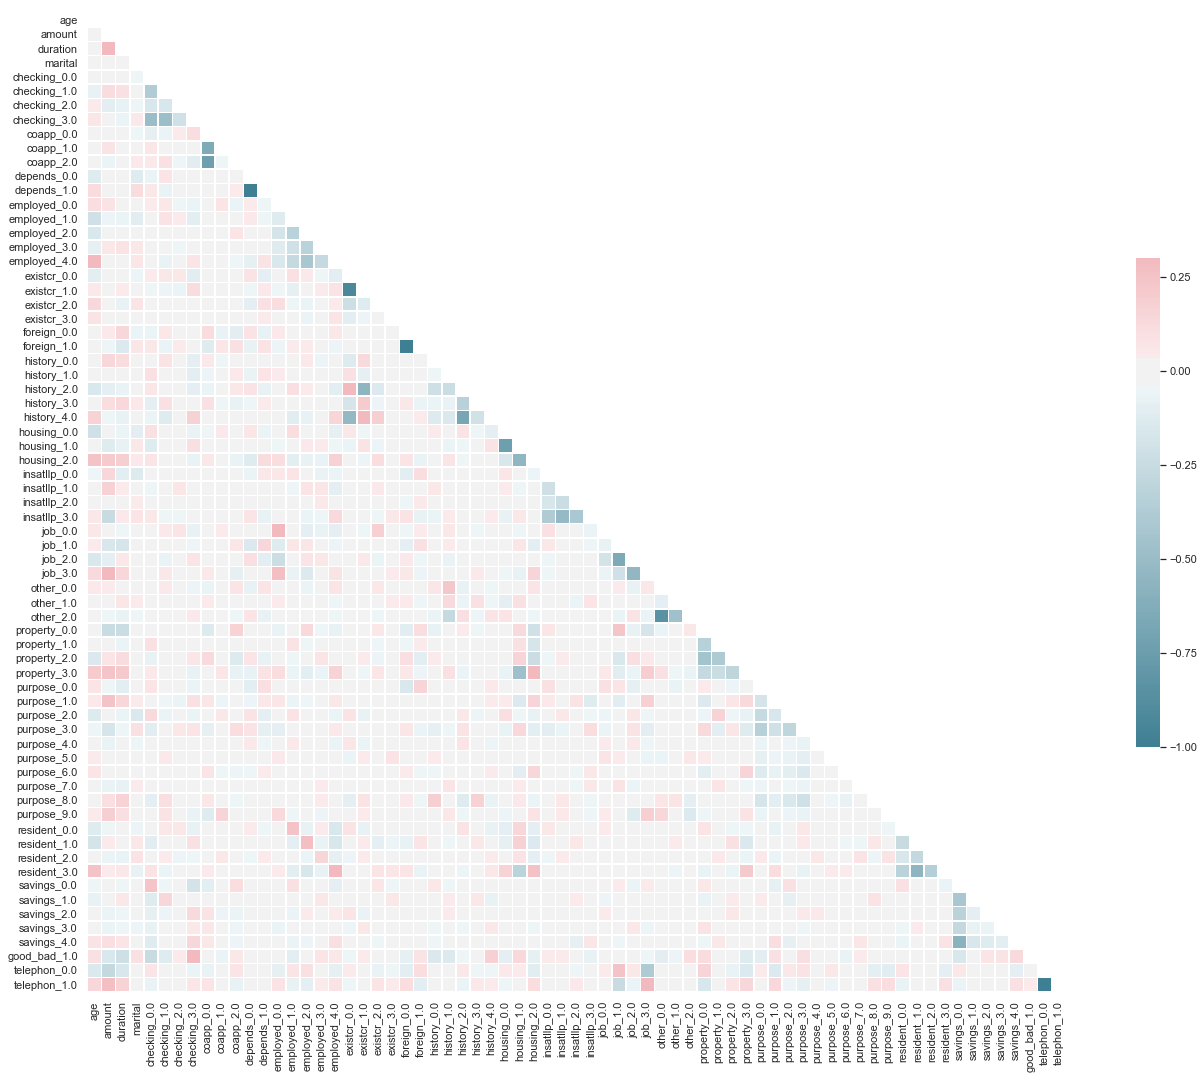

In [12]:
import seaborn as sns
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(25, 18))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [13]:
coormatrix=resultfinal.corr()
coormatrix['good_bad_1.0']

age             0.091127
amount         -0.154739
duration       -0.214927
marital         0.088184
checking_0.0   -0.258333
checking_1.0   -0.119581
checking_2.0    0.044009
checking_3.0    0.322436
coapp_0.0       0.000751
coapp_1.0      -0.062728
coapp_2.0       0.055039
depends_0.0    -0.003015
depends_1.0     0.003015
employed_0.0   -0.039815
employed_1.0   -0.106397
employed_2.0   -0.010603
employed_3.0    0.075980
employed_4.0    0.059733
existcr_0.0    -0.045727
existcr_1.0     0.036579
existcr_2.0     0.031746
existcr_3.0    -0.005651
foreign_0.0    -0.082079
foreign_1.0     0.082079
history_0.0    -0.144767
history_1.0    -0.134448
history_2.0    -0.043722
history_3.0    -0.012325
history_4.0     0.181713
housing_0.0    -0.092785
                  ...   
job_3.0        -0.040559
other_0.0      -0.096510
other_1.0      -0.050523
other_2.0       0.113285
property_0.0    0.119300
property_1.0   -0.007238
property_2.0   -0.011121
property_3.0   -0.125750
purpose_0.0    -0.096900


In [14]:
#We see no significant correlation with the target variable

In [15]:
#Storing the data for analysis
y = np.asarray(resultfinal['good_bad_1.0'])
X = np.asarray(resultfinal.drop('good_bad_1.0', axis=1))

In [16]:
np_y = np.ravel(y) #convert dataframe column to flat array

**Neural Networks**

Network lists considered - (3), (11), (5,4), (6,5), (7,6), and (8,7)

Activation : RELU

Solver : lbfgs

In [17]:
print("\n******** NEURAL NETWORK ********")
#Neural Network
network_list = [(3), (11), (5,4), (6,5), (7,6), (8,7)]
score_list = ['accuracy', 'recall', 'precision', 'f1']


for nn in network_list:
    fnn = MLPClassifier(hidden_layer_sizes=nn, activation='relu',solver='lbfgs', max_iter=2000, random_state=12345)
    mean_score = []
    std_score = []
    print("NList=", nn)
    print("{:.<13s}{:>6s}{:>13s}".format("Metric", "Mean", "Std. Dev."))
    for s in score_list:
        fnn_10 = cross_val_score(fnn, X, np_y, scoring=s, cv=4)
        mean = fnn_10.mean()
        std = fnn_10.std()
        mean_score.append(mean)
        std_score.append(std)
        print("{:.<13s}{:>7.4f}{:>10.4f}".format(s, mean, std))
    
    fnn1 = fnn.fit(X, np_y)
    NeuralNetwork.display_binary_metrics(fnn1, X, np_y)


******** NEURAL NETWORK ********
NList= 3
Metric.......  Mean    Std. Dev.
accuracy..... 0.7450    0.0273
recall....... 0.8600    0.0216
precision.... 0.7935    0.0215
f1........... 0.8253    0.0183

Model Metrics
Observations...............      1000
Features...................        68
Number of Layers...........         1
Number of Outputs..........         1
Number of Neurons..........         3
Number of Weights..........       211
Number of Iterations.......       683
Activation Function........  logistic
Mean Absolute Error........    0.3022
Avg Squared Error..........    0.1518
Accuracy...................    0.7620
Precision..................    0.7992
Recall (Sensitivity).......    0.8814
F1-Score...................    0.8383
MISC (Misclassification)...     23.8%
     class 0...............     51.7%
     class 1...............     11.9%


     Confusion
       Matrix     Class 0   Class 1  
Class 0.....       145       155
Class 1.....        83       617

NList= 11
Metric.

**Select model with Network List (6,5)**
The model has accuracy of 76.1 %, REcall of 91.71%, precision of 78.21% and F1 score of 84.31%

In [18]:
#Checking prediction accuracy on training data set
X_train, X_validate, y_train, y_validate = train_test_split(X,np_y,test_size = 0.3, random_state=12345)
fnn = MLPClassifier(hidden_layer_sizes=(6,5), activation='relu', alpha=0.0, solver='lbfgs', max_iter=5000,random_state=12345)
fnn = fnn.fit(X_train,y_train)
NeuralNetwork.display_binary_metrics(fnn, X_train, y_train)


Model Metrics
Observations...............       700
Features...................        68
Number of Layers...........         2
Number of Outputs..........         1
Number of Neurons..........        11
Number of Weights..........       455
Number of Iterations.......       786
Activation Function........  logistic
Mean Absolute Error........    0.3438
Avg Squared Error..........    0.1718
Accuracy...................    0.7357
Precision..................    0.7539
Recall (Sensitivity).......    0.9100
F1-Score...................    0.8246
MISC (Misclassification)...     26.4%
     class 0...............     64.0%
     class 1...............      9.0%


     Confusion
       Matrix     Class 0   Class 1  
Class 0.....        80       142
Class 1.....        43       435



The neural Network Model preditcted with accuracy of 73.57 %, Recall of 91%, precision of 75.39% and F1 score of 82.46% on Training Data.

In [20]:
#Prediction on Test Data
NeuralNetwork.display_binary_metrics(fnn, X_validate, y_validate)


Model Metrics
Observations...............       300
Features...................        68
Number of Layers...........         2
Number of Outputs..........         1
Number of Neurons..........        11
Number of Weights..........       455
Number of Iterations.......       786
Activation Function........  logistic
Mean Absolute Error........    0.3178
Avg Squared Error..........    0.1514
Accuracy...................    0.7933
Precision..................    0.8053
Recall (Sensitivity).......    0.9505
F1-Score...................    0.8719
MISC (Misclassification)...     20.7%
     class 0...............     65.4%
     class 1...............      5.0%


     Confusion
       Matrix     Class 0   Class 1  
Class 0.....        27        51
Class 1.....        11       211



The neural Network Model preditcted with accuracy of 79.33 %, Recall of 95.05%, precision of 80.53% and F1 score of 87.19% on Training Data.

**Model Building with Decisoin Tree with 10 fold cross validation.**

Search depths are 5,6,7,8,10,12,15,20,25.

Split Criteria - Gini

In [77]:
#Decision Tree
#10 fold CV with variation of depth
score_list = ['accuracy', 'recall', 'precision', 'f1']
search_depths = [5,6,7,8,10,12,15,20,25]
for d in search_depths:
    dtc = DecisionTreeClassifier(criterion='gini', max_depth=d, min_samples_split=5, min_samples_leaf=5)
    mean_score = []
    std_score = []
    print("max_depth=", d)
    print("{:.<13s}{:>6s}{:>13s}".format("Metric", "Mean", "Std. Dev."))
    for s in score_list:
        dtc_10 = cross_val_score(dtc, X, y, scoring=s, cv=10)
        mean = dtc_10.mean()
        std = dtc_10.std()
        mean_score.append(mean)
        std_score.append(std)
        print("{:.<13s}{:>7.4f}{:>10.4f}".format(s, mean, std))


max_depth= 5
Metric.......  Mean    Std. Dev.
accuracy..... 0.7170    0.0272
recall....... 0.8657    0.0400
precision.... 0.7662    0.0396
f1........... 0.8120    0.0116
max_depth= 6
Metric.......  Mean    Std. Dev.
accuracy..... 0.7100    0.0214
recall....... 0.8400    0.0473
precision.... 0.7718    0.0423
f1........... 0.8008    0.0089
max_depth= 7
Metric.......  Mean    Std. Dev.
accuracy..... 0.7080    0.0346
recall....... 0.8329    0.0456
precision.... 0.7721    0.0399
f1........... 0.8032    0.0237
max_depth= 8
Metric.......  Mean    Std. Dev.
accuracy..... 0.7100    0.0326
recall....... 0.8100    0.0487
precision.... 0.7846    0.0373
f1........... 0.7927    0.0204
max_depth= 10
Metric.......  Mean    Std. Dev.
accuracy..... 0.7000    0.0424
recall....... 0.7957    0.0613
precision.... 0.7886    0.0424
f1........... 0.7884    0.0319
max_depth= 12
Metric.......  Mean    Std. Dev.
accuracy..... 0.6950    0.0367
recall....... 0.7757    0.0519
precision.... 0.7849    0.0357
f1.......

Depth Selected - 5 with accuracy of 71.7 %, Recall of 86.57%, precision of 76.62% and F1 score of 81.2%. This is lower than the Neural Networks prediction.

In [78]:
dtc7030 = DecisionTreeClassifier(criterion='gini', max_depth=5,min_samples_split=5, min_samples_leaf=5)
dtc7030 = dtc7030.fit(X_train,y_train)
dtczz = DecisionTreeClassifier(criterion='gini', max_depth=5,min_samples_split=5, min_samples_leaf=5)
dtcyy = dtczz.fit(X_train,y_train)
predtree = dtc7030.predict(X_validate)
trainpred=dtc7030.predict(X_train)
print("Accuracy on Training Data of Decision Trees with Depth 5: " , metrics.accuracy_score(y_validate, predtree))

Accuracy on Training Data of Decision Trees with Depth 5:  0.7133333333333334


In [79]:
#visual confusion matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



In [80]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_validate, predtree, labels=[1,0])
np.set_printoptions(precision=2)

Test Data Prediction
Confusion matrix, without normalization
[[167  55]
 [ 31  47]]


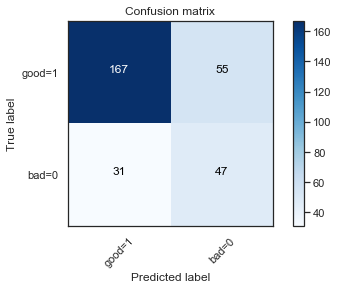

In [83]:
print("Test Data Prediction")
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['good=1','bad=0'],normalize= False,  title='Confusion matrix')


In [84]:
print("Test Data Prediction")
from sklearn.metrics import classification_report, confusion_matrix
print (classification_report(y_validate, predtree))
accuracy=(163+44)/(163+44+34+59)
print("Accuracy:",accuracy)


Test Data Prediction
              precision    recall  f1-score   support

           0       0.46      0.60      0.52        78
           1       0.84      0.75      0.80       222

   micro avg       0.71      0.71      0.71       300
   macro avg       0.65      0.68      0.66       300
weighted avg       0.74      0.71      0.72       300

Accuracy: 0.69


Train Data Prediction
Confusion matrix, without normalization
[[394  84]
 [ 61 161]]


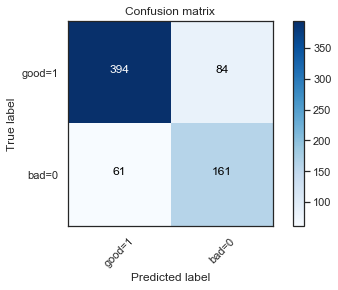

In [85]:
print("Train Data Prediction")
#train Compute confusion matrix
cnf_matrix = confusion_matrix(y_train, trainpred, labels=[1,0])
np.set_printoptions(precision=2)
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['good=1','bad=0'],normalize= False,  title='Confusion matrix')



In [86]:
print("Train Data Prediction")
from sklearn.metrics import classification_report
print (classification_report(y_train, trainpred))
accuracy=(394+161)/(394+161+61+84)
print("Accuracy:",accuracy)


Train Data Prediction
              precision    recall  f1-score   support

           0       0.66      0.73      0.69       222
           1       0.87      0.82      0.84       478

   micro avg       0.79      0.79      0.79       700
   macro avg       0.76      0.77      0.77       700
weighted avg       0.80      0.79      0.80       700

Accuracy: 0.7928571428571428


In [87]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_train,trainpred)

from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline

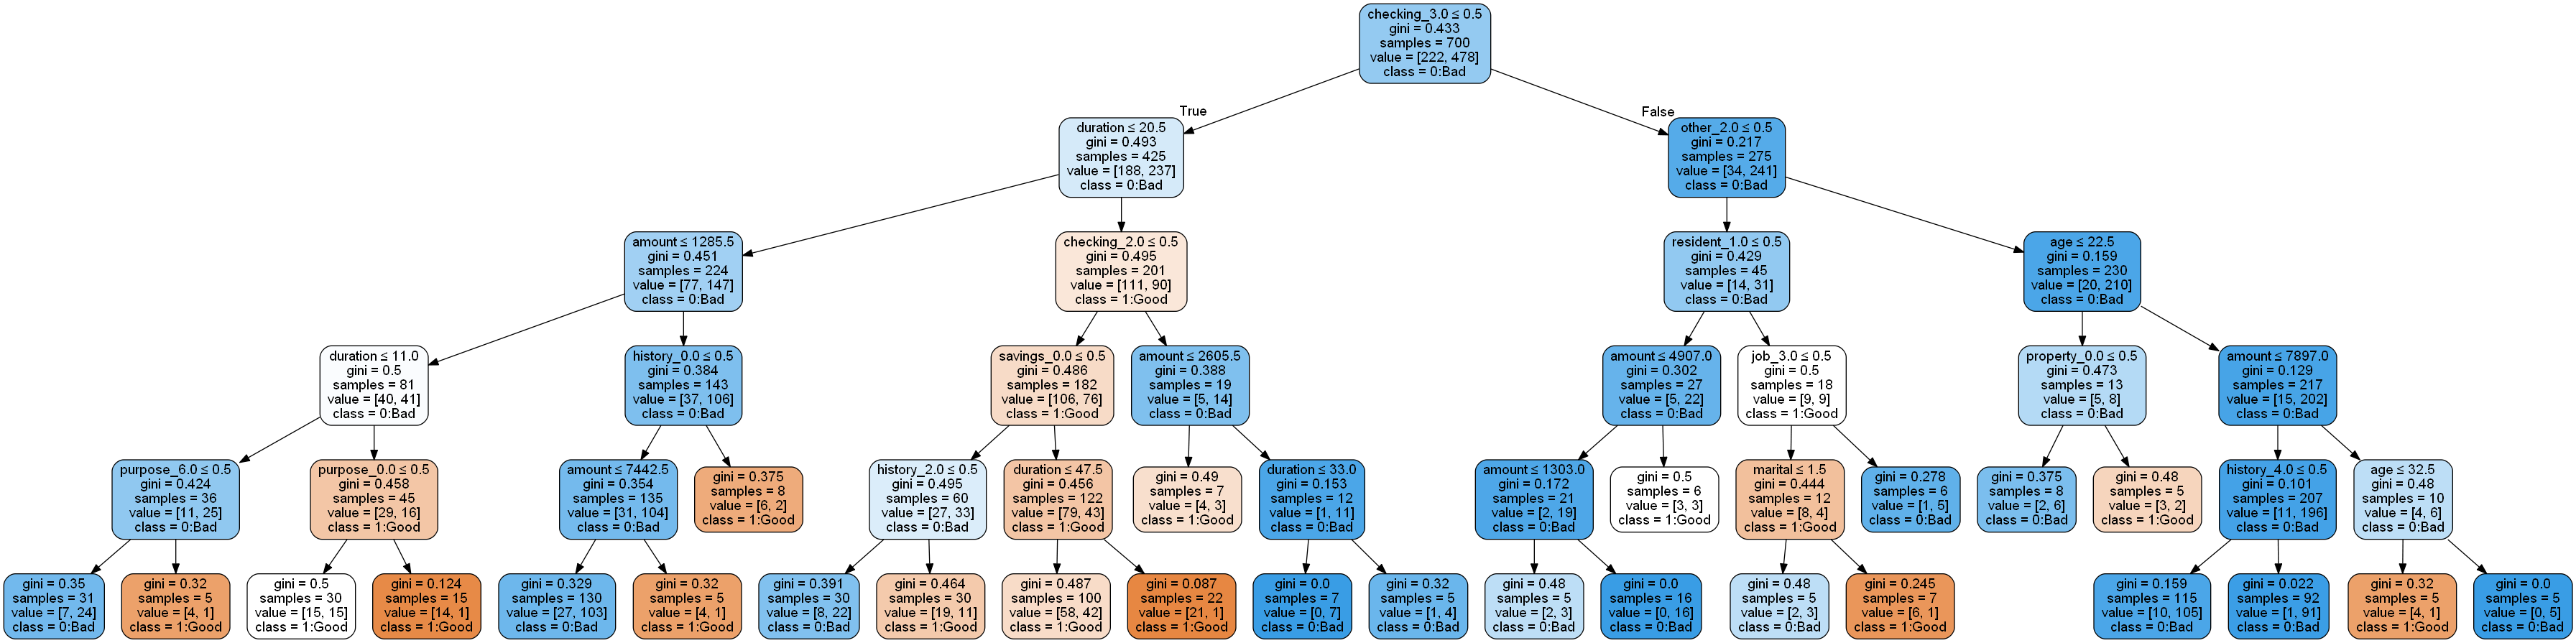

In [88]:
# from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
featureNames=resultfinal.columns[0:68]
export_graphviz(dtc7030,out_file=dot_data, feature_names=featureNames, class_names= ['1:Good','0:Bad'], filled=True, rounded=True,  special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Decisoin Tree Result for Depth Selected - 5 on Test Result:
    
Accuracy of 69 %, Recall of 71%, precision of 74% and F1 score of 72%. This is lower than the Neural Networks prediction.

**Random Forests**

Depths consisdered : None, 2, 3, 4, 5, 6, 7, 8, 9, 10

Trees : 10, 20, 50, 100, 500

In [34]:
# Cross-Validation
max_depth_list = [None, 2, 3, 4, 5, 6, 7, 8, 9, 10]
n_trees_list = [10, 20, 50, 100, 500]
score_list = ['accuracy', 'recall', 'precision', 'f1']
max_f1 = 0
n_trees = 100
for n_trees in n_trees_list:
    for d in max_depth_list:
        print("\nNumber of Trees: ", n_trees, " Max_Depth: ", d)
        rfc = RandomForestClassifier(n_estimators=n_trees, criterion="gini",max_depth=d, min_samples_split=2,min_samples_leaf=1, max_features='auto', n_jobs=4, bootstrap=True, random_state=12345)
        scores = cross_validate(rfc, X, np_y, scoring=score_list, return_train_score=False, cv=5)
        print("{:.<13s}{:>6s}{:>13s}".format("Metric", "Mean", "Std. Dev."))
        for s in score_list:
            var = "test_"+s
            mean = scores[var].mean()
            std = scores[var].std()
            print("{:.<13s}{:>7.4f}{:>10.4f}".format(s, mean, std))
        if mean > max_f1:
            max_f1 = mean
            best_depth = d
            best_n_trees = n_trees
print("\nBest based on F1-Score from a forest with ", best_n_trees, " trees.")
print("Best Depth (trees) = ", best_depth)


Number of Trees:  10  Max_Depth:  None
Metric.......  Mean    Std. Dev.
accuracy..... 0.7280    0.0287
recall....... 0.8286    0.0433
precision.... 0.7922    0.0109
f1........... 0.8095    0.0239

Number of Trees:  10  Max_Depth:  2
Metric.......  Mean    Std. Dev.
accuracy..... 0.7030    0.0081
recall....... 0.9971    0.0035
precision.... 0.7029    0.0050
f1........... 0.8246    0.0044

Number of Trees:  10  Max_Depth:  3
Metric.......  Mean    Std. Dev.
accuracy..... 0.7120    0.0196
recall....... 0.9800    0.0177
precision.... 0.7146    0.0105
f1........... 0.8265    0.0121

Number of Trees:  10  Max_Depth:  4
Metric.......  Mean    Std. Dev.
accuracy..... 0.7170    0.0175
recall....... 0.9671    0.0147
precision.... 0.7225    0.0090
f1........... 0.8271    0.0109

Number of Trees:  10  Max_Depth:  5
Metric.......  Mean    Std. Dev.
accuracy..... 0.7210    0.0185
recall....... 0.9500    0.0221
precision.... 0.7316    0.0090
f1........... 0.8265    0.0127

Number of Trees:  10  Max_

Metric.......  Mean    Std. Dev.
accuracy..... 0.7070    0.0040
recall....... 1.0000    0.0000
precision.... 0.7049    0.0028
f1........... 0.8269    0.0019

Number of Trees:  500  Max_Depth:  4
Metric.......  Mean    Std. Dev.
accuracy..... 0.7130    0.0117
recall....... 0.9914    0.0083
precision.... 0.7118    0.0072
f1........... 0.8287    0.0066

Number of Trees:  500  Max_Depth:  5
Metric.......  Mean    Std. Dev.
accuracy..... 0.7250    0.0114
recall....... 0.9743    0.0132
precision.... 0.7263    0.0062
f1........... 0.8322    0.0074

Number of Trees:  500  Max_Depth:  6
Metric.......  Mean    Std. Dev.
accuracy..... 0.7320    0.0117
recall....... 0.9629    0.0171
precision.... 0.7358    0.0054
f1........... 0.8341    0.0082

Number of Trees:  500  Max_Depth:  7
Metric.......  Mean    Std. Dev.
accuracy..... 0.7320    0.0157
recall....... 0.9486    0.0228
precision.... 0.7411    0.0080
f1........... 0.8320    0.0111

Number of Trees:  500  Max_Depth:  8
Metric.......  Mean    St

In [29]:
#Evaluate the random forest with the best configuration
col = resultfinal.columns
col

Index(['age', 'amount', 'duration', 'marital', 'checking_0.0', 'checking_1.0',
       'checking_2.0', 'checking_3.0', 'coapp_0.0', 'coapp_1.0', 'coapp_2.0',
       'depends_0.0', 'depends_1.0', 'employed_0.0', 'employed_1.0',
       'employed_2.0', 'employed_3.0', 'employed_4.0', 'existcr_0.0',
       'existcr_1.0', 'existcr_2.0', 'existcr_3.0', 'foreign_0.0',
       'foreign_1.0', 'history_0.0', 'history_1.0', 'history_2.0',
       'history_3.0', 'history_4.0', 'housing_0.0', 'housing_1.0',
       'housing_2.0', 'insatllp_0.0', 'insatllp_1.0', 'insatllp_2.0',
       'insatllp_3.0', 'job_0.0', 'job_1.0', 'job_2.0', 'job_3.0', 'other_0.0',
       'other_1.0', 'other_2.0', 'property_0.0', 'property_1.0',
       'property_2.0', 'property_3.0', 'purpose_0.0', 'purpose_1.0',
       'purpose_2.0', 'purpose_3.0', 'purpose_4.0', 'purpose_5.0',
       'purpose_6.0', 'purpose_7.0', 'purpose_8.0', 'purpose_9.0',
       'resident_0.0', 'resident_1.0', 'resident_2.0', 'resident_3.0',
       'saving

In [30]:
col=col.drop("good_bad_1.0")
col

Index(['age', 'amount', 'duration', 'marital', 'checking_0.0', 'checking_1.0',
       'checking_2.0', 'checking_3.0', 'coapp_0.0', 'coapp_1.0', 'coapp_2.0',
       'depends_0.0', 'depends_1.0', 'employed_0.0', 'employed_1.0',
       'employed_2.0', 'employed_3.0', 'employed_4.0', 'existcr_0.0',
       'existcr_1.0', 'existcr_2.0', 'existcr_3.0', 'foreign_0.0',
       'foreign_1.0', 'history_0.0', 'history_1.0', 'history_2.0',
       'history_3.0', 'history_4.0', 'housing_0.0', 'housing_1.0',
       'housing_2.0', 'insatllp_0.0', 'insatllp_1.0', 'insatllp_2.0',
       'insatllp_3.0', 'job_0.0', 'job_1.0', 'job_2.0', 'job_3.0', 'other_0.0',
       'other_1.0', 'other_2.0', 'property_0.0', 'property_1.0',
       'property_2.0', 'property_3.0', 'purpose_0.0', 'purpose_1.0',
       'purpose_2.0', 'purpose_3.0', 'purpose_4.0', 'purpose_5.0',
       'purpose_6.0', 'purpose_7.0', 'purpose_8.0', 'purpose_9.0',
       'resident_0.0', 'resident_1.0', 'resident_2.0', 'resident_3.0',
       'saving

In [35]:
rfc = RandomForestClassifier(n_estimators=best_n_trees, criterion="gini",max_depth=best_depth, min_samples_split=2,min_samples_leaf=1, max_features='auto', n_jobs=4, bootstrap=True, random_state=12345)
rfc= rfc.fit(X_train, y_train)
DecisionTree.display_binary_split_metrics(rfc, X_train, y_train,X_validate, y_validate)
DecisionTree.display_importance(rfc, col, top=10)



Model Metrics..........       Training     Validation
Observations...........            700            300
Features...............             68             68
Maximum Tree Depth.....              9              9
Minimum Leaf Size......              1              1
Minimum split Size.....              2              2
Mean Absolute Error....         0.2349         0.3367
Avg Squared Error......         0.0750         0.1537
Accuracy...............         0.9571         0.7800
Precision..............         0.9409         0.8023
Recall (Sensitivity)...         1.0000         0.9324
F1-score...............         0.9696         0.8625
MISC (Misclassification)...       4.3%          22.0%
     class 0...............      13.5%          65.4%
     class 1...............       0.0%           6.8%


Training
Confusion Matrix  Class 0   Class 1  
Class 0.....       192        30
Class 1.....         0       478


Validation
Confusion Matrix  Class 0   Class 1  
Class 0.....        27

The Random Forest model results the accruacy of 78%, Recall of 93.24%, precision of 80.23% and F1 score of 86.25%. The training model for Random forest however shows 95.71% Accuracy, which shows overfitting of curve. Hence we rely on neural network with Neural Netwrork - 6,5.